In [3]:
#This notebook 

In [138]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.ndimage.interpolation import shift

In [5]:
#getting the training data
data = pd.read_csv("train.csv")

In [6]:
#what data looks like
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#size of the data
data.shape

(42000, 785)

In [9]:
#save the label column to a variable
label = data["label"]

In [10]:
#drop the label column
data = data.drop("label", axis=1)

In [11]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#check the label size
label.shape

(42000,)

In [29]:
#check the type of the data
data.dtypes.head()

pixel0    int64
pixel1    int64
pixel2    int64
pixel3    int64
pixel4    int64
dtype: object

In [36]:
#check the first value of the dataframe
data.values[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [152]:
#assign the data and the label to X and y
X = data
y = label

In [153]:
type(X)

pandas.core.frame.DataFrame

In [154]:
#check the distribution of the 10 digits
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [155]:
#check the missing value
X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [156]:
label.isnull().any()

False

In [157]:
#convert the dataframe to numpy array since all the data values are homogeneous
X = X.as_matrix()

In [158]:
type(X)

numpy.ndarray

In [68]:
X.shape

(42000, 784)

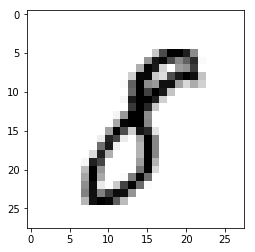

In [117]:
#we can check a specific image
some_digit = X[5000]
some_digit_correctShape = some_image.reshape(28,28)
plt.imshow(some_image_correctShape,cmap = mpl.cm.binary)
plt.show()

In [72]:
#check the label for that image
y[5000]

8

In [73]:
#make the test set
test = pd.read_csv("test.csv")

In [74]:
test.shape

(28000, 784)

In [75]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
test = test.as_matrix()

In [104]:
#split the training and validaition set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [105]:
X_train.shape

(33600, 784)

In [106]:
X_test.shape

(8400, 784)

In [107]:
y_train.shape

(33600,)

In [108]:
y_test.shape

(8400,)

In [113]:
#we can first try to create a classifier for one digit (5)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [112]:
X_train_5.shape

(33600, 784)

In [115]:
#using the sgd classifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

In [116]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [119]:
sgd_clf.predict([some_digit])

array([False])

In [120]:
y[28025]

5

In [123]:
sgd_clf.predict([X[28025]])

array([ True])

In [127]:
#measuring accuracy for classifier that classify "5"
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96258929, 0.950625  , 0.96446429])

In [132]:
#seems like we have a pretty high prediction accuracy, but let's check out the number counts of instances 5
y_train_5.value_counts()

False    30507
True      3093
Name: label, dtype: int64

In [133]:
#ok, we have only 9.2% instances of number 5, the data is highly skewed,
#if we just guess all the values to be "not 5", we'll get over 90% accuracy! now the previous accuracy scores we got 
#do not seem so promissing...
3093/(30507+3093)

0.09205357142857143

In [136]:
#Let's create a "dumb" classifier that classifies every digits to "not 5" to illustrate
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [137]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91071429, 0.90571429, 0.90741071])

In [139]:
#This case shows that the accuracy score sometimes is not a good performance measurement for classifiers, especially
#when the data is skewed. 
#instead, we can use confusion matrix to evaluate the performance of the classifier
#to create confusion matrix first we need some prediction values to compare with the true values
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [144]:
confu_matrix = confusion_matrix(y_true = y_train_5, y_pred = y_train_pred)

In [173]:
confu_matrix_df = pd.DataFrame(confu_matrix, columns=['predicted negative','predicted postive'], index=['actual negative', 'actual positive'])
confu_matrix_df.


,predicted negative,predicted postive
actual negative,30239,268
actual positive,1102,1991


In [183]:
#in total of (30239+268)=30507 of non-5-images, 30239 of them are correctly classified, 268 of them are incorrectly classified
#in total of (30239+268)=3093 of 5-images, 1991 of them are correctly classified, 1102 of them are incorrectly classified
TN = 30239
FP = 268
FN = 1102
TP = 1991

In [184]:
#we take a look at the accuracy of the positive predictions = "precision"
#precision = TP/(TP+FP)
TP/(TP+FP)

0.8813634351482957

In [185]:
#another metric to look at is recall = sensitivity = TP/(TP+FN)
TP/(TP+FN)

0.6437116068541868

In [186]:
#accuracy = (TP + TN)/(TN+TP+FN+FP)
(TP + TN)/(TN + TP + FN + FP)

0.9592261904761905

In [187]:
#error rate = 1-accuracy
1-(TP + TN)/(TN + TP + FN + FP)

0.04077380952380949

In [188]:
#we can also use the build in functions to calculate the precision and recall values
precision_score(y_train_5, y_train_pred)

0.8813634351482957

In [189]:
recall_score(y_train_5, y_train_pred)

0.6437116068541868

In [190]:
# now we have a clear view of how our 5-detctor classifier performs,
# it classifies 5 correctly 88% of the time and it only detects 64% of the 5s

In [191]:
# f1 score can be used as a performance measurement as well
# f1 score is the harmonic mean of precision and recall, which mean it gives much more weight to the low values
# as result, f1 is only high when both precision and recall are high
# 2((precision*recall)/(precision+recall))
f1_score(y_train_5, y_train_pred)

0.7440209267563527

In [192]:
#to deal with the precision and recall tread off, we can adjust the threshold
#first calculate the decision scores for all instances
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [196]:
y_scores.shape

(33600,)

In [197]:
#then we can calculate the precision and recall for all possible thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [212]:
precisions.shape

(32964,)

In [213]:
recalls.shape

(32964,)

In [214]:
thresholds.shape

(32963,)

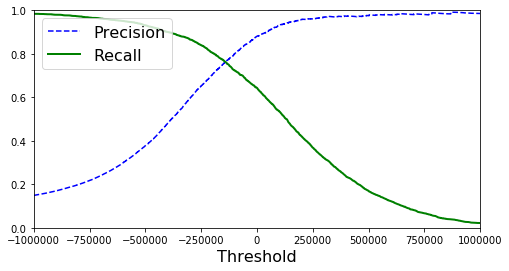

In [220]:
#we can plot them
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1], "b--", label="Precision" )
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-1000000, 1000000])
plt.show()

In [237]:
# for example if we want 90% precesion
y_train_pred_90 = (y_scores > 50000)

In [238]:
precision_score(y_train_5, y_train_pred_90)

0.904027846842367

In [239]:
recall_score(y_train_5, y_train_pred_90)

0.5877788554801164

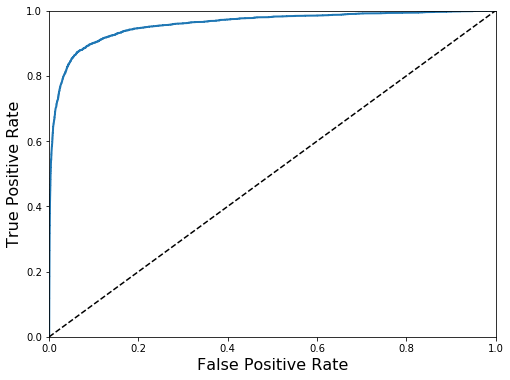

In [240]:
#The ROC curve can be used to determine models performance
#ROC plot is made by tpr(recall) vs fpr = true positive rate Vs  false positive rate
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [241]:
#AUC = area under the curve
roc_auc_score(y_train_5, y_scores)

0.9586813438088672

In [242]:
#lets compare AUC for randomforest and StochasticGradientDescent classificier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [243]:
#calculate the score for randomforest classifier
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

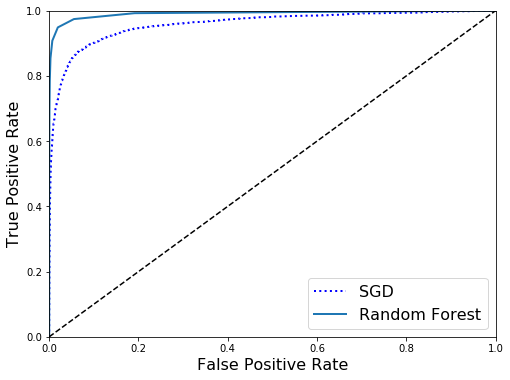

In [244]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [245]:
#random forest performs better
roc_auc_score(y_train_5, y_scores_forest)

0.9910919619440192

In [246]:
#precision score for randomforest
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9837925445705025

In [247]:
#recall score for radomforest
recall_score(y_train_5, y_train_pred_forest)

0.7849983834464921

In [248]:
######################################################################################################################
######################################################################################################################
######################################################################################################################

In [ ]:
#next step, we will continuous work on the muliclass classification
